# Decision Tree

> Decision Tree

In [ ]:
#| default_exp decisiontree

## Advantages of CART

- Simple to understand, interpret, visualize.
- Decision trees implicitly performvariable screening or feature selection.
- Can handle both numerical and categorical data. Can also handle multi-output problems.
- Decision trees require relatively little effort from users for data preparation.
- Nonlinear relationships between parameters do not affect tree performance.

## Disadvantages of CART

- Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting.
- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This is called variance, which needs to be lowered by methods like bagging and boosting.
- Greedy algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees, where the features and samples are randomly sampled with replacement.
- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the data set prior to fitting with the decision tree.

In [ ]:
#| export
import pandas as pd

In [ ]:
#| export
df = pd.read_csv("Data/salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
#| export
inputs = df.drop('salary_more_then_100k',axis='columns')

In [ ]:
#| export
target = df['salary_more_then_100k']

In [ ]:
#| export
from sklearn.preprocessing import LabelEncoder

In [ ]:
#| export
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [ ]:
#| export
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [ ]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [ ]:
#| export
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

In [ ]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [ ]:
#| export
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#| export
np.random.seed(42)
n_points = len(inputs_n)
x = np.random.rand(n_points)
y = np.random.rand(n_points)
z = np.random.rand(n_points)

In [ ]:
#| export
inputs_n['company_n'] += (x-0.5)/10
inputs_n['job_n'] += (y-0.5)/10
inputs_n['degree_n'] += (z-0.5)/10

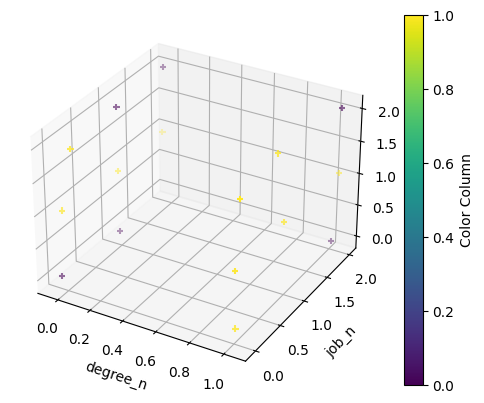

In [ ]:
#| export
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('degree_n')
ax.set_ylabel('job_n')
ax.set_zlabel('company_n')

scatter = ax.scatter(inputs_n['degree_n'],
           inputs_n['job_n'],
           inputs_n['company_n'],
           c=target,
           cmap='viridis',
           marker='+')

# Adding a color bar to show the mapping of colors to values in 'color_column'
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Color Column')

In [ ]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [ ]:
#| export
from sklearn import tree

In [ ]:
#| export
model = tree.DecisionTreeClassifier()
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [ ]:
#| export
model.score(inputs_n,target)

1.0

In [ ]:
#| export
from sklearn.tree import export_graphviz

In [ ]:
#| export
FEATURE_NAMES = ['company_n', 'job_n', 'degree_n']
export_graphviz(model, 'Data/salary.dot', feature_names = FEATURE_NAMES)

In [ ]:
!dot -Tpng ./Data/salary.dot -o ./Data/salary.png

In [ ]:
#| export
import matplotlib.pyplot as plt
import cv2 as cv

<matplotlib.image.AxesImage>

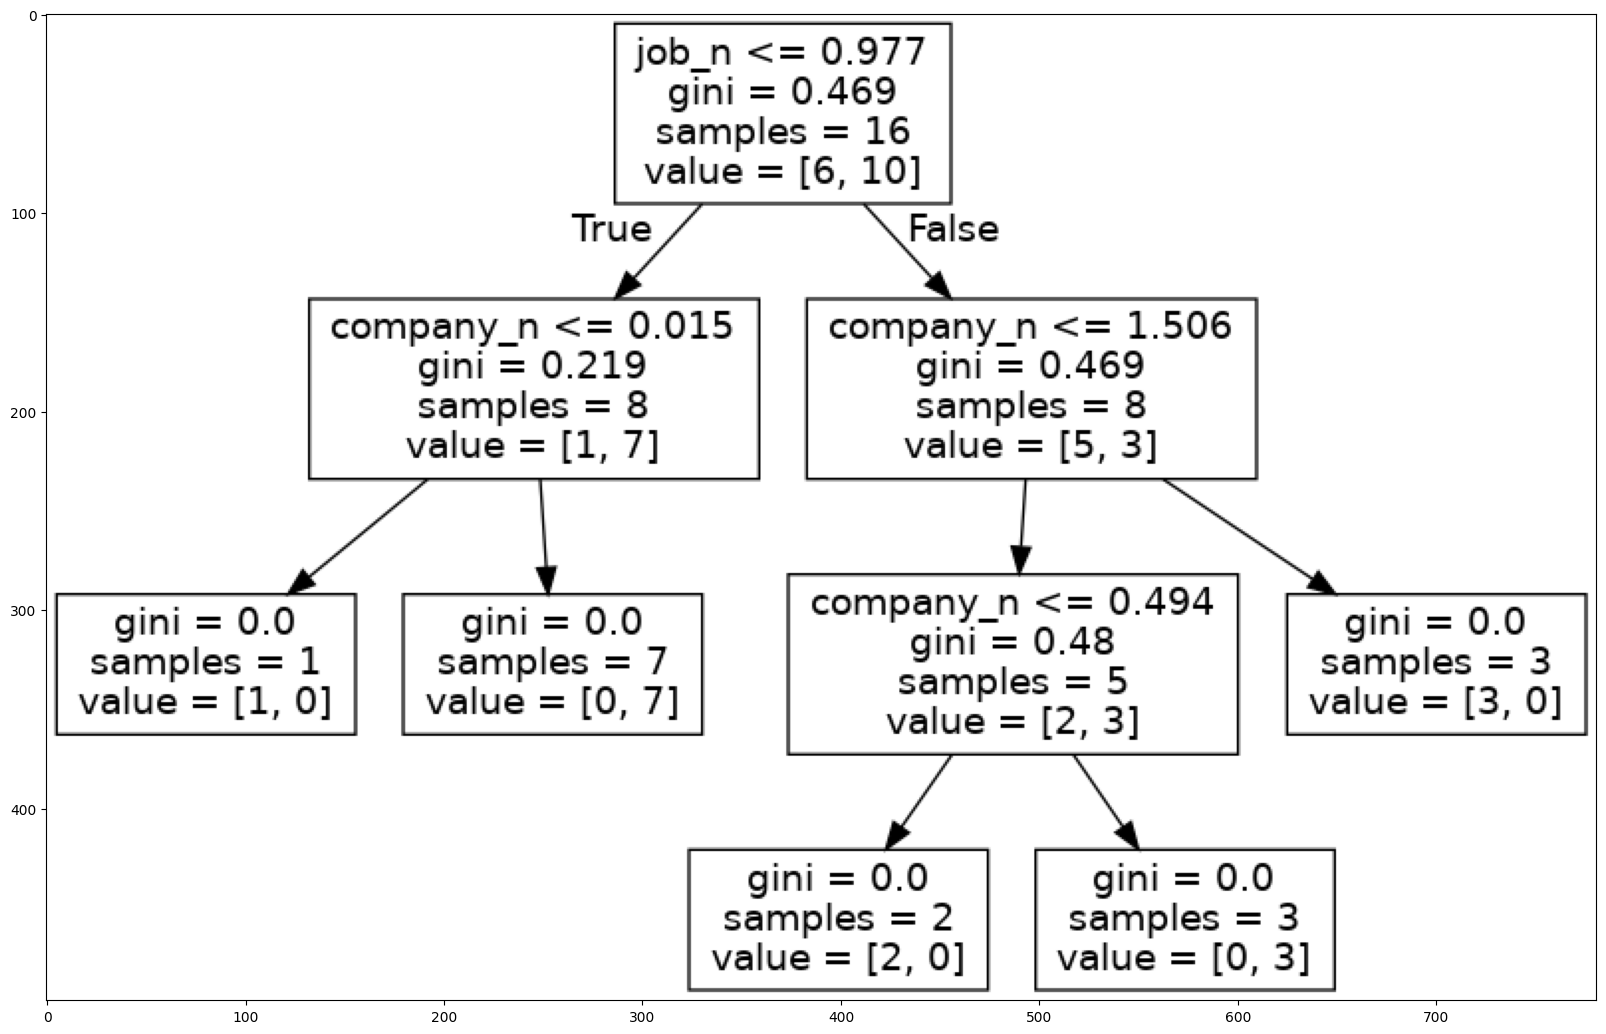

In [ ]:
#| export

img = cv.imread('./Data/salary.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

## Predict

In [ ]:
#| export
model.predict([[2,1,0]])

/home/ben/mambaforge/envs/fast/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
#| export
model.predict([[2,1,1]])

/home/ben/mambaforge/envs/fast/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])